---
# Funciones


### <font color = darkred>Es un bloque de código que recibe argumentos como entrada, sigue una secuencia de condiciones o acciones, las cuales devuelve un valor y/o realizan una tarea, y este bloque puede ser llamados cuando se necesite.</font>

### El uso de funciones tiene varias ventajas:
- #### Modularización: permite segmentar un programa complejo en una serie de partes o módulos más simples, facilitando así la programación y el depurado.
- #### Reutilización: permite reutilizar una misma función en distintos programas.


### La función `def` es para crear funciones definidas por el usuario

<img src="https://raw.githubusercontent.com/Bioinformatica2020/Anexos/master/funcion_def.jpg" width = 60%>


## Las funciones nos van a permitir simplificar los programas, hacerlos más estructurados y más sencillos de mofificar y mantener.
---

In [66]:
def f():
    """Descripción de la función"""
    valor = 'Mi primera función'
    return  valor

In [67]:
f()

'Mi primera función'

In [63]:
?f

In [68]:
def ff(num, num2):
    print(num * num2)

In [2]:
ff()

<function __main__.f(num, num2)>

In [3]:
f(100, 434)

43400


# <font color = red>Ejercicio:</font>
## Empecemos hacieno una función para descargar archivos desde el navegador

### Esta función te permitirá descargar archivos, nombrarlos automáticamente y depositarlos en el directorio descargas
### <font color = purple>siempre y cuando la URL tengan esta estructura: </font> `dir/dir/dir/nombre_de_archivo`
que el `nombre_de_archivo` no tenga caracteres como: `!, @, #, ?, $, ^, &, *, (), [], +`

In [72]:
# si urllib.request no funciona
def DES(url = ''):
    import subprocess
    archivo = url.split('/')[-1]
    salida = subprocess.call(['curl', url, '-o','../descargas/'+archivo])
    if salida == 0:
        print('Archivo descargado correctamente:', archivo)
    else:
        print('El archivo no se descargó')

In [73]:
def DES(url = ''):
    import urllib.request
    archivo = url.split('/')[-1]
    salida = urllib.request.urlretrieve(url, '../descargas/'+archivo)
    if salida[0] == '../descargas/'+archivo:
        print('Archivo descargado correctamente:', archivo)
    else:
        print('El archivo no se descargó')
        print(salida[0])

### Descargar los siguientes archivos que se usarán para la tarea

In [74]:
url = 'https://raw.githubusercontent.com/Bioinformatica2020/tareas/master/UniProt_sequences.fasta'

In [75]:
url = 'https://raw.githubusercontent.com/Bioinformatica2020/tareas/master/UniProt_sequences2.fasta'

In [76]:
DES(url = url)

Archivo descargado correctamente: UniProt_sequences2.fasta


## <font color = red>Ejercicio:</font>
* ### Crea una función que reciba como argumento un archivo fasta
* ### Que de salida devuelva un diccionario:
   1. #### Con el identificador como clave
   - #### Los géneros como valor

* ### A partir del diccionario determina la frecuencia de los géneros identificados y representa los más abundantes en un gráfico de barras
* ### Usar la siguiente secuencia fasta para este ejercicio
https://raw.githubusercontent.com/Bioinformatica2020/Semana4/master/Secuencias_UniProt.fasta

In [101]:
def organismos(seq = ''):
    import re
    sce = open(seq,'r')
    sce = sce.read()
    sce = re.sub('>...','>', sce)
    sce = sce.split('>')[1:]
    #
    salida = {}
    for i in sce:
        iden = re.search('\w+', i).group()
        organismo = re.search('OS=\w+', i).group()
        organismo = re.sub('OS=', '', organismo)
        salida[iden] = organismo
    return salida

In [102]:
org = organismos(seq = '../descargas/Secuencias_UniProt.fasta')
org

{'Q0IG33': 'Aedes',
 'A0A182G0J2': 'Aedes',
 'B0W407': 'Culex',
 'A0A182ISM3': 'Anopheles',
 'Q7PWV9': 'Anopheles',
 'A0A084VYE5': 'Anopheles',
 'A0A182P5W9': 'Anopheles',
 'A0A182K939': 'Anopheles',
 'A0A182TN03': 'Anopheles',
 'A0A182UZV0': 'Anopheles',
 'A0A182KNF8': 'Anopheles',
 'A0A182XDH3': 'Anopheles',
 'A0A2C9GS95': 'Anopheles',
 'A0A182VU41': 'Anopheles',
 'A0A182QCK7': 'Anopheles',
 'A0A182NUN0': 'Anopheles',
 'A0A182MC44': 'Anopheles',
 'A0A1B0AXD5': 'Glossina',
 'A0A1A9XVH2': 'Glossina',
 'A0A1A9ZYC8': 'Glossina',
 'A0A1B0G3G6': 'Glossina',
 'A0A1A9V2E1': 'Glossina',
 'A0A0L0BTT8': 'Lucilia',
 'A0A1A9WMX0': 'Glossina',
 'A0A3B0JUJ6': 'Drosophila',
 'B4GAK7': 'Drosophila',
 'A0A151XDF6': 'Trachymyrmex',
 'E2B4M8': 'Harpegnathos',
 'E2AFW7': 'Camponotus',
 'A0A2J7Q9V4': 'Cryptotermes',
 'Q291K8': 'Drosophila',
 'F4X091': 'Acromyrmex',
 'A0A158NH39': 'Atta',
 'A0A195AYZ3': 'Atta',
 'A0A195F6N9': 'Trachymyrmex',
 'Q9V719': 'Drosophila',
 'A0A1I8NYU0': 'Stomoxys',
 'A0A232F2S9'

In [89]:
from collections import Counter

In [172]:
generos  = Counter(org.values())
generos

Counter({'Aedes': 2,
         'Culex': 1,
         'Anopheles': 15,
         'Glossina': 6,
         'Lucilia': 1,
         'Drosophila': 12,
         'Trachymyrmex': 3,
         'Harpegnathos': 1,
         'Camponotus': 1,
         'Cryptotermes': 1,
         'Acromyrmex': 1,
         'Atta': 2,
         'Stomoxys': 1,
         'Trichomalopsis': 1,
         'Temnothorax': 1,
         'Cyphomyrmex': 1,
         'Ooceraea': 1,
         'Apis': 2,
         'Zootermopsis': 1,
         'Musca': 1,
         'Dufourea': 1,
         'Asbolus': 1,
         'Nasonia': 1,
         'Clunio': 1,
         'Heliothis': 1,
         'Blattella': 1,
         'Diaphorina': 1,
         'Tribolium': 1,
         'Chilo': 1,
         'Rhodnius': 1,
         'Papilio': 2,
         'Habropoda': 1,
         'Danaus': 1,
         'Laodelphax': 1,
         'Pediculus': 1,
         'Dendroctonus': 1,
         'Bombyx': 1,
         'Octopus': 1,
         'Operophtera': 1,
         'Lingula': 1,
         'Leptotrom

In [173]:
frecuencia = []
for i in generos:
    if generos[i] > 4:
        print(i,generos[i])
        frecuencia.append([i,generos[i]])
        

Anopheles 15
Glossina 6
Drosophila 12
Xenopus 8
Amphiprion 5
Oryctolagus 5
Felis 8
Enhydra 5
Odobenus 5
Ursus 13
Poecilia 8
Monodelphis 5
Vombatus 5
Trichechus 7
Sus 5
Tarsius 5
Macaca 14
Gorilla 7
Mandrillus 5
Tursiops 6
Lipotes 5
Papio 5
Physeter 5
Cercocebus 5
Rhinopithecus 10
Pan 13
Cebus 5
Saimiri 5
Canis 5
Nomascus 5
Callorhinchus 5
Alligator 6
Equus 6
Trichinella 6


In [174]:
import matplotlib.pyplot as plt

In [175]:
frecuencia

[['Anopheles', 15],
 ['Glossina', 6],
 ['Drosophila', 12],
 ['Xenopus', 8],
 ['Amphiprion', 5],
 ['Oryctolagus', 5],
 ['Felis', 8],
 ['Enhydra', 5],
 ['Odobenus', 5],
 ['Ursus', 13],
 ['Poecilia', 8],
 ['Monodelphis', 5],
 ['Vombatus', 5],
 ['Trichechus', 7],
 ['Sus', 5],
 ['Tarsius', 5],
 ['Macaca', 14],
 ['Gorilla', 7],
 ['Mandrillus', 5],
 ['Tursiops', 6],
 ['Lipotes', 5],
 ['Papio', 5],
 ['Physeter', 5],
 ['Cercocebus', 5],
 ['Rhinopithecus', 10],
 ['Pan', 13],
 ['Cebus', 5],
 ['Saimiri', 5],
 ['Canis', 5],
 ['Nomascus', 5],
 ['Callorhinchus', 5],
 ['Alligator', 6],
 ['Equus', 6],
 ['Trichinella', 6]]

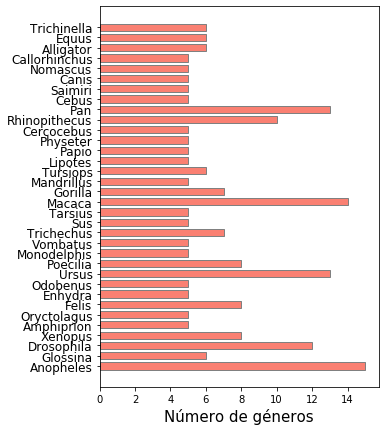

In [171]:
fig, ax = plt.subplots(figsize=(5,7))

for i in frecuencia:
    ax.barh(i[0], i[1],
             color= 'salmon',
             align='center',
             height= 0.7,linewidth = 1,
             alpha = 1, edgecolor= 'grey')
plt.yticks(size = 12)
plt.xlabel("Número de géneros",size= 15)
    
plt.show()

In [168]:
from pandas import DataFrame
frecuencia2 = DataFrame(frecuencia).sort_values(by =1,ascending=True)
frecuencia2

,0,1
15,Tarsius,5
20,Lipotes,5
30,Callorhinchus,5
14,Sus,5
21,Papio,5
12,Vombatus,5
11,Monodelphis,5
22,Physeter,5
23,Cercocebus,5
7,Enhydra,5


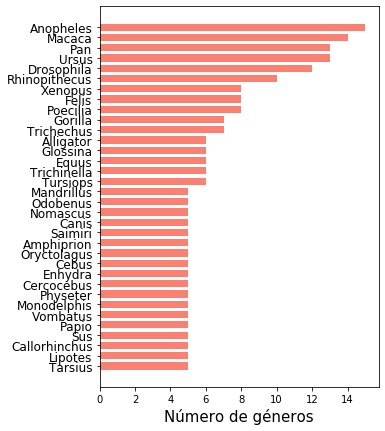

In [169]:
fig, ax = plt.subplots(figsize=(5,7))

for i, j in zip(frecuencia2[0], frecuencia2[1]):
    ax.barh(i, j,
             color= 'salmon',
             align='center',
             height= 0.7,linewidth = 0,
             alpha = 1, edgecolor= 'black')
plt.yticks(size = 12)
plt.xlabel("Número de géneros",size= 15)
    
plt.show()